# Este documento é o codigo para processamento dos dados


## Import de bibliotecas

Começando com os imports do que era preciso para preparar os dados


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Import dos dados
Depois de importadas as bibliotecas começou se a carregar os csvs.

Primeiro o vinho tinto:

In [41]:
redwine = pd.read_csv('winequality-red.csv', sep=';')

De seguida o vinho branco:

In [42]:
whitewine = pd.read_csv('winequality-white.csv', sep=';')

## União de dados

Como estão em ficheiros separados iremos de ter de unir os dados

Para diferenças entre tinto(*red*) e branco(*white*) criamos
uma tabela que se define se é tinto ou não cujo o nome desta está definido
na variável winetype como *Red_wine*

In [43]:
winetype = 'Red_wine'
# adicionou se a coluna para se definir os sets dos vinhos como tintos
# ou seja adicionou a coluna Red_wine com 1s
redwine[winetype] = np.ones(redwine.shape[0])
# adicionou se a coluna para se definir os sets dos vinhos como brancos
# ou seja adicionou a coluna Red_wine com 0s
whitewine[winetype] = np.zeros(whitewine.shape[0])

Depois de adicionar a adicional coluna nos datasets, fundiu-se ambos num só chamado merged

In [44]:
merged = redwine.append(whitewine)

## Edição dos nomes das colunas

Depois dos valores serem fundidos fez-se com que o nome
das features ficassem mais padronizadas, ou seja,
sem espaços(estes trocados por *_*) e capitalizadas

In [45]:
merged.columns = [column.capitalize().replace(' ','_') for column in merged.columns]

Demonstrando os valores atuais:

In [46]:
print(merged.head(5))

   Fixed_acidity  Volatile_acidity  Citric_acid  Residual_sugar  Chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   Free_sulfur_dioxide  Total_sulfur_dioxide  Density    Ph  Sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   Alcohol  Quality  Red_wine  
0      9.4        5       1.0  
1      9.8        5   

Como exemplo do que se deve ser esperado:

|    |   Fixed_acidity |   Volatile_acidity |   Citric_acid |   Residual_sugar |   Chlorides |   Free_sulfur_dioxide |   Total_sulfur_dioxide |   Density |   Ph |   Sulphates |   Alcohol |   Quality |   Red_wine |
|---:|----------------:|-------------------:|--------------:|-----------------:|------------:|----------------------:|-----------------------:|----------:|-----:|------------:|----------:|----------:|-----------:|
|  0 |             7.4 |               0.7  |          0    |              1.9 |       0.076 |                    11 |                     34 |    0.9978 | 3.51 |        0.56 |       9.4 |         5 |          1 |
|  1 |             7.8 |               0.88 |          0    |              2.6 |       0.098 |                    25 |                     67 |    0.9968 | 3.2  |        0.68 |       9.8 |         5 |          1 |
|  2 |             7.8 |               0.76 |          0.04 |              2.3 |       0.092 |                    15 |                     54 |    0.997  | 3.26 |        0.65 |       9.8 |         5 |          1 |
|  3 |            11.2 |               0.28 |          0.56 |              1.9 |       0.075 |                    17 |                     60 |    0.998  | 3.16 |        0.58 |       9.8 |         6 |          1 |
|  4 |             7.4 |               0.7  |          0    |              1.9 |       0.076 |                    11 |                     34 |    0.9978 | 3.51 |        0.56 |       9.4 |         5 |          1 |

## Limpeza de dados

Verificou se a existência de valores duplicados, começando por guardar o numero de elementos originais:


In [47]:
# saving the number of elements
inicial_size = merged.shape[0]
print(f"inicial_size: {inicial_size}")

inicial_size: 6497


de seguida ve-se se existem valores duplicados:

In [48]:
# removing dup
unduplicated = merged.drop_duplicates()
after_size = unduplicated.shape[0]
print(f"after_size: {after_size}")
print(f"it was removed {(1 - (after_size / merged.shape[0])) * 100}% of the original value")

after_size: 5320
it was removed 18.11605356318301% of the original value


o que se verifica se que a percentagem destes é ~18.12% dos dados

Analisando com mais cuidado podemos ver uma lista dos que foram removidos:

In [49]:
number_of_red_wine = unduplicated[unduplicated['Red_wine'] == 1.0].shape[0]
number_of_white_wine = unduplicated.shape[0] - number_of_red_wine
print(f'original number of white wines: {whitewine.shape[0]} ; original number of red wines: {redwine.shape[0]}')
print(f"duplicated number of red wines = {redwine.shape[0]- number_of_red_wine}")
print(f"duplicated number of white wines = {whitewine.shape[0]- number_of_white_wine}")
print(f"relation of white wines / red wines = {number_of_white_wine/number_of_red_wine}")
print(f"relation of red wines / white wines = {number_of_red_wine/number_of_white_wine}")

original number of white wines: 4898 ; original number of red wines: 1599
duplicated number of red wines = 240
duplicated number of white wines = 937
relation of white wines / red wines = 2.9146431199411333
relation of red wines / white wines = 0.3430951779853572


Podemos ver que a diferença entre os dois tem uma relação um valor de cerca de 1:3 o que ve se como aceitável usando então como valor de default:

In [50]:
merged = unduplicated

De seguida verificou-se se os dados tinham dados vazios: 

In [51]:

# removing nulls
dropped = merged.dropna()
after_size = dropped.shape[0]
print(f"after_size: {after_size}")
print(f"it was removed {(1 - (after_size / merged.shape[0])) * 100}% of the original value")

after_size: 5320
it was removed 0.0% of the original value


O que se verificou que não existiam valores inválidos.

## Guardar o ficheiro

Depois de tratados os dados salvou se no ficheiro *merged.csv*

In [52]:
merged.to_csv(index=False, path_or_buf='merged.csv')

## Analise dos dados

Começou se por verificar se existem ligação entre a qualidade e os outros atributos

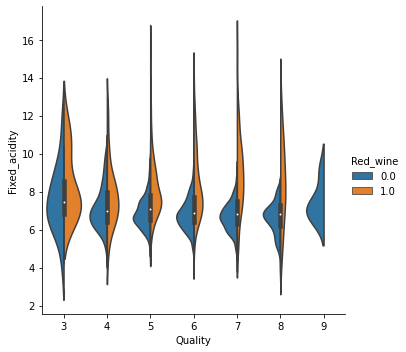

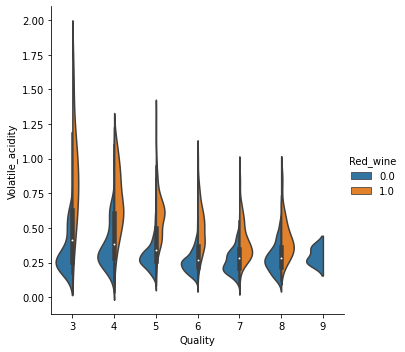

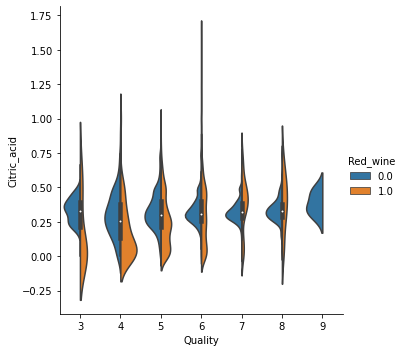

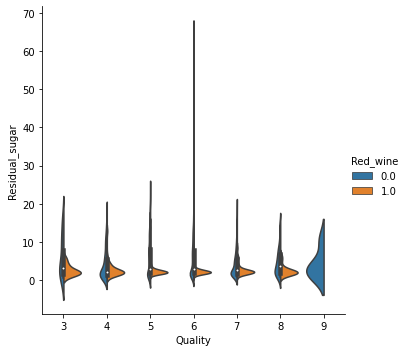

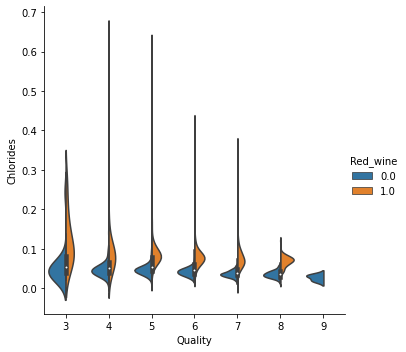

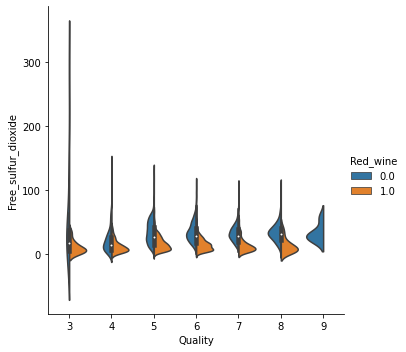

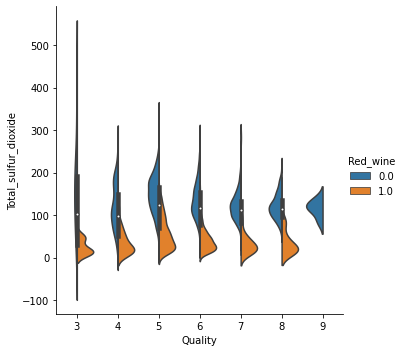

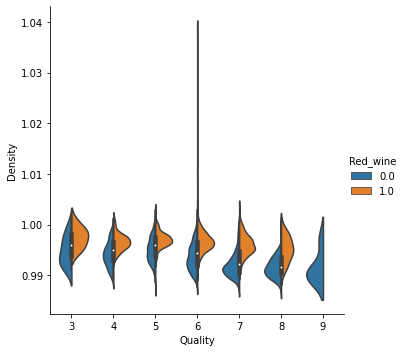

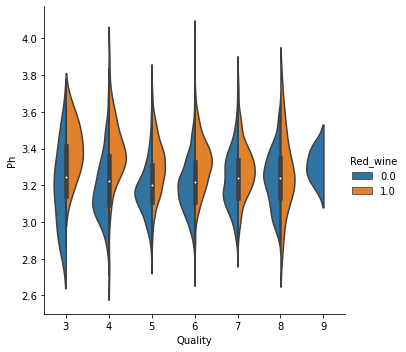

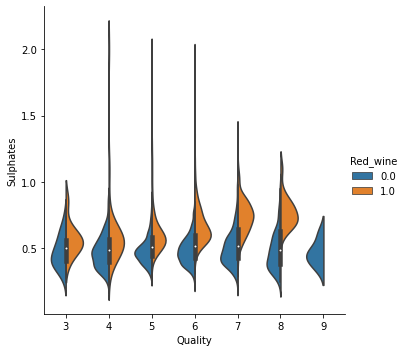

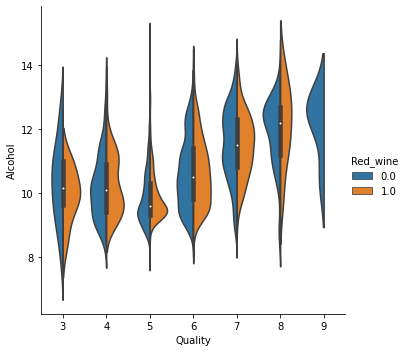

In [53]:
# afeto com o ph na qualidade
for column in merged.columns:
    if column == 'Quality' or column == 'Red_wine':
        continue
    sns.catplot(data=merged, kind='violin', x='Quality', y=column, hue='Red_wine', split=True)
    plt.show()



Observando os gráficos pode se verifica que:
- Aqueles com maior quantidade de álcool podem ter melhor qualidade
- Aqueles com menos acidez volátil tem melhor qualidade no caso dos vinhos tintos.

## Implementação das pipelines

Definição da pipeline a ser aplicada

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# num_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('attribs_adder', CompinedAttributesAdder()),
#     ('std_scaler', StandardScaler())
# ])

for column in merged.columns:
    print(f'{column}: {merged[column].min()}, {merged[column].mean()}, {merged[column].max()}')

Fixed_acidity: 3.8, 7.215178571428571, 15.9
Volatile_acidity: 0.08, 0.3441296992481203, 1.58
Citric_acid: 0.0, 0.31849436090225564, 1.66
Residual_sugar: 0.6, 5.0484774436090225, 65.8
Chlorides: 0.009, 0.056689849624060144, 0.611
Free_sulfur_dioxide: 1.0, 30.036654135338345, 289.0
Total_sulfur_dioxide: 6.0, 114.10902255639098, 440.0
Density: 0.98711, 0.9945352988721804, 1.03898
Ph: 2.72, 3.2246635338345864, 4.01
Sulphates: 0.22, 0.5333571428571429, 2.0
Alcohol: 8.0, 10.549241228070175, 14.9
Quality: 3, 5.795676691729323, 9
Red_wine: 0.0, 0.2554511278195489, 1.0


## Outliners


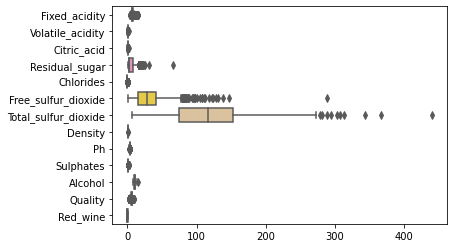

In [55]:
ax = sns.boxplot(data=merged, orient="h", palette="Set2")

## Normalização de dados

### Ph

O ph pode ser facilmente normalizado já que é um valor que vai de 0 a 14


In [56]:
merged['Ph'] = (merged['Ph']) /(14)

### Álcool

O álcool já é uma percentagem logo só é preciso dividir o valor por 100:  

In [57]:
merged['Alcohol'] = merged['Alcohol']/100

### Outros

Nos outros valores foram aplicadas a formula basica de normalização:

In [58]:
for column in merged.columns:
    if column == 'Ph' or column == 'Red_wine' or column == 'Alcohol':
        continue
    merged[column] = (merged[column] - merged[column].min())/ (merged[column].max()-merged[column].min())